In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [5]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [76]:
""" Model is Rainfall Weather Forecasting.There is 8425 rows and 23 columns.
setting data as index for good understanig."""

' Model is Rainfall Weather Forecasting.There is 8425 rows and 23 columns.\nsetting data as index for good understanig.'

In [16]:
df=df.set_index(df['Date'])

In [17]:
df.drop('Date', axis=1,inplace=True)

In [18]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.843433,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.000000,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.000000,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.000000,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.000000,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.000000,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.000000,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.000000,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [19]:
for i in df:
    print(df[i].value_counts())

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
0.000000    5299
0.584804     406
0.736806     177
0.843433     116
1.062659      86
            ... 
3.940795       1
5.039684       1
4.481405       1
3.252267       1
3.419952       1
Name: Rainfall, Length: 250, dtype: int64
4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Leng

In [21]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [ ]:
"""Below observations are found:
There are a lot of null values in dataset.
Rainfall we have to predict is having 240 null values and around 5299 zero values.Which directly says data will right skewed.
mostly all columns are categorical.Rainfall will be treat as contnious.
model which predict rainfall tomorrow will be classification model and rainfall prediction will be regression model.

In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,0.554807,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,0.904775,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,7.185516,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [22]:
df.drop(['Sunshine','Evaporation'], axis=1, inplace=True)

In [77]:
"""sunshine and evaporation having around 3.5k null values which is appx half of data row.Treating will give some weird answers
so droping them directly"""

'sunshine and evaporation having around 3.5k null values which is appx half of data row.Treating will give some weird answers\nso droping them directly'

In [23]:
df=df.dropna(subset=['RainTomorrow'])

In [ ]:
#droping nan values from our target variable.

In [24]:
df.isnull().sum()

Location            0
MinTemp            60
MaxTemp            35
Rainfall          107
WindGustDir       953
WindGustSpeed     953
WindDir9am        809
WindDir3pm        286
WindSpeed9am       62
WindSpeed3pm       86
Humidity9am        44
Humidity3pm        83
Pressure9am      1292
Pressure3pm      1293
Cloud9am         2291
Cloud3pm         2331
Temp9am            41
Temp3pm            77
RainToday         107
RainTomorrow        0
dtype: int64

In [25]:
df = df.dropna(subset=['Rainfall'])

In [ ]:
#rainfall will be our second model so droping nan from this too

In [26]:
df.isnull().sum()

Location            0
MinTemp            48
MaxTemp            34
Rainfall            0
WindGustDir       945
WindGustSpeed     945
WindDir9am        795
WindDir3pm        283
WindSpeed9am       49
WindSpeed3pm       83
Humidity9am        36
Humidity3pm        80
Pressure9am      1285
Pressure3pm      1286
Cloud9am         2207
Cloud3pm         2247
Temp9am            33
Temp3pm            74
RainToday           0
RainTomorrow        0
dtype: int64

In [27]:
new=df[['Location','RainTomorrow','RainToday','WindDir3pm','WindDir9am','WindGustDir','Location','MinTemp','MaxTemp', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]

In [28]:
from sklearn.impute import SimpleImputer

In [ ]:
#firstly imputing then encoding nan values

In [29]:
si=SimpleImputer(strategy='most_frequent')

In [30]:
for i in new:
    df[i]=si.fit_transform(df[[i]])

In [31]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
li=LabelEncoder()

In [34]:
new2=df[['Location','RainTomorrow','RainToday','WindDir3pm','WindDir9am','WindGustDir','Location']]

In [35]:
for i in new2:
    df[i]=li.fit_transform(df[[i]])

In [ ]:
# data is now endoded and all nan were filled.
# checing which feature is highly related so not changing much in it.

<AxesSubplot:>

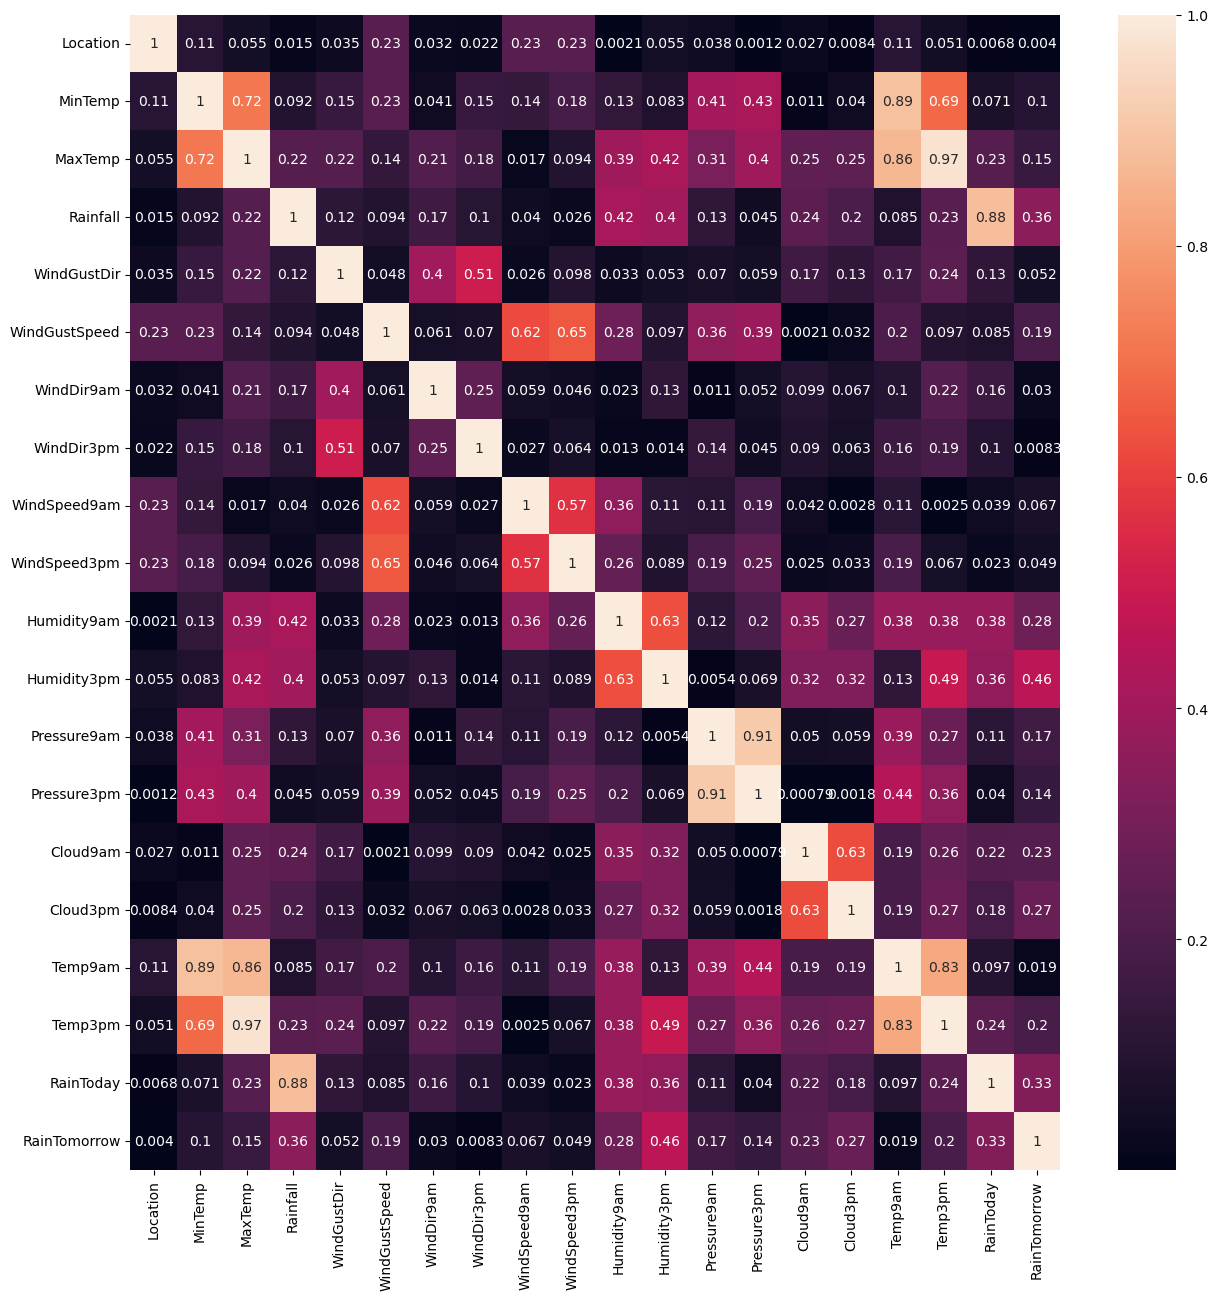

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().abs(),annot=True)

In [37]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#droping highly related columns

In [38]:
df.drop(['Temp9am','Pressure3pm','Humidity9am','WindGustSpeed'],axis=1, inplace=True)

<AxesSubplot:>

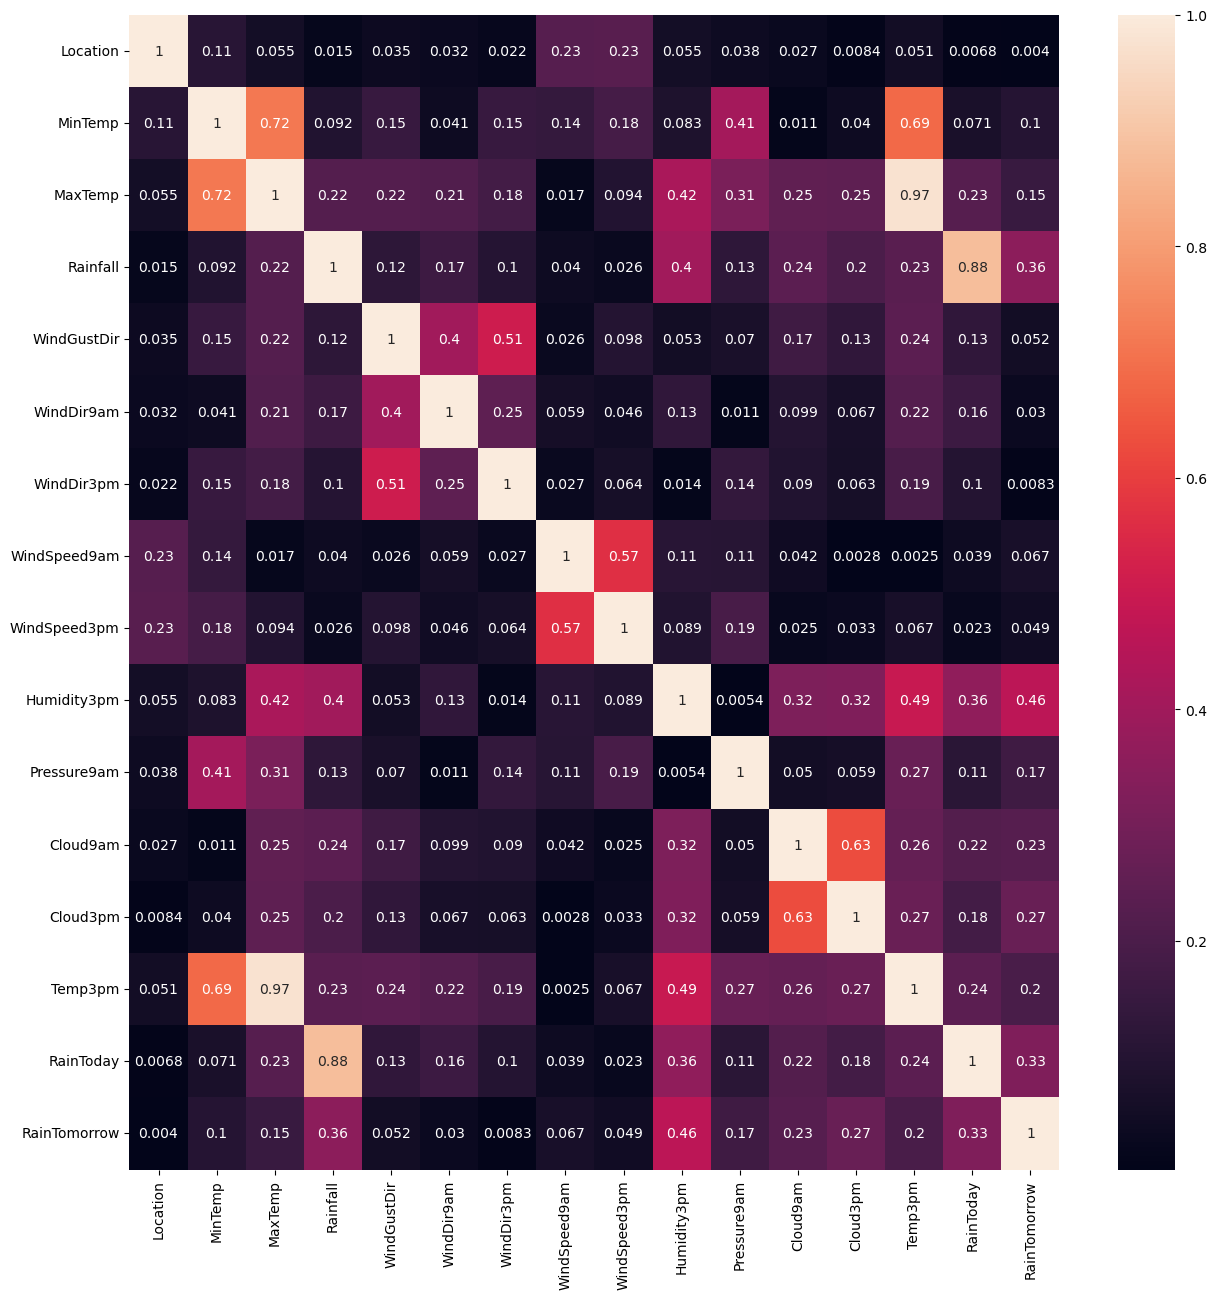

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().abs(),annot=True)

In [40]:
df.drop(['MaxTemp'],axis=1, inplace=True)

<AxesSubplot:>

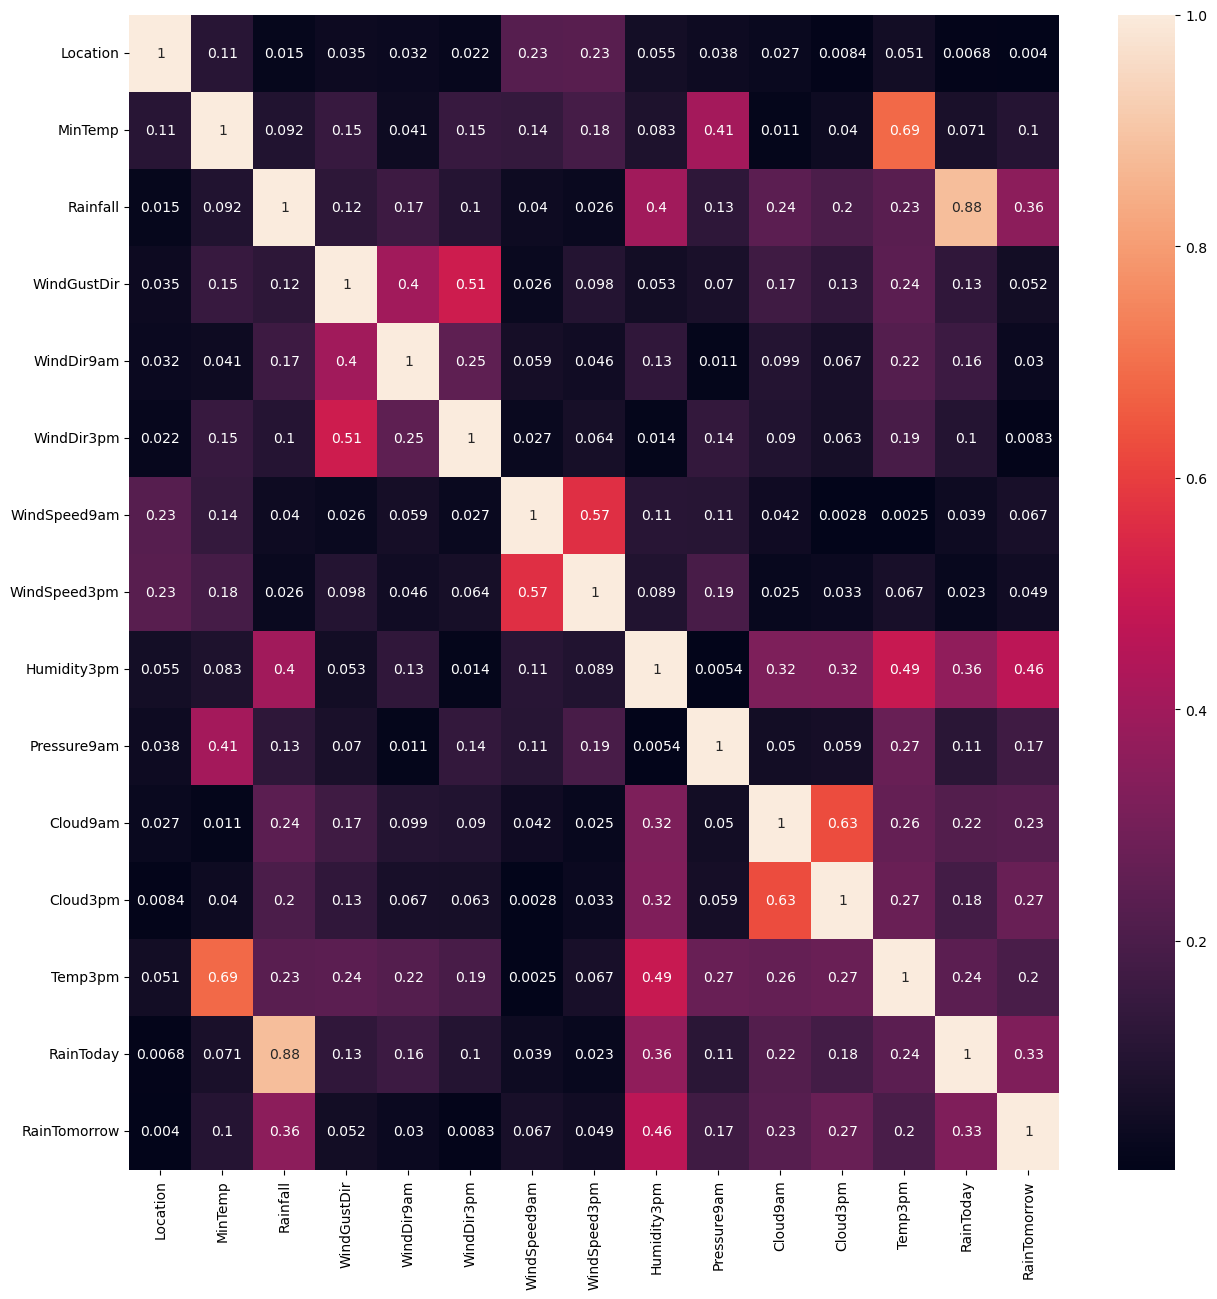

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().abs(),annot=True)

In [42]:
df.drop(['Temp3pm'],axis=1, inplace=True)

<AxesSubplot:>

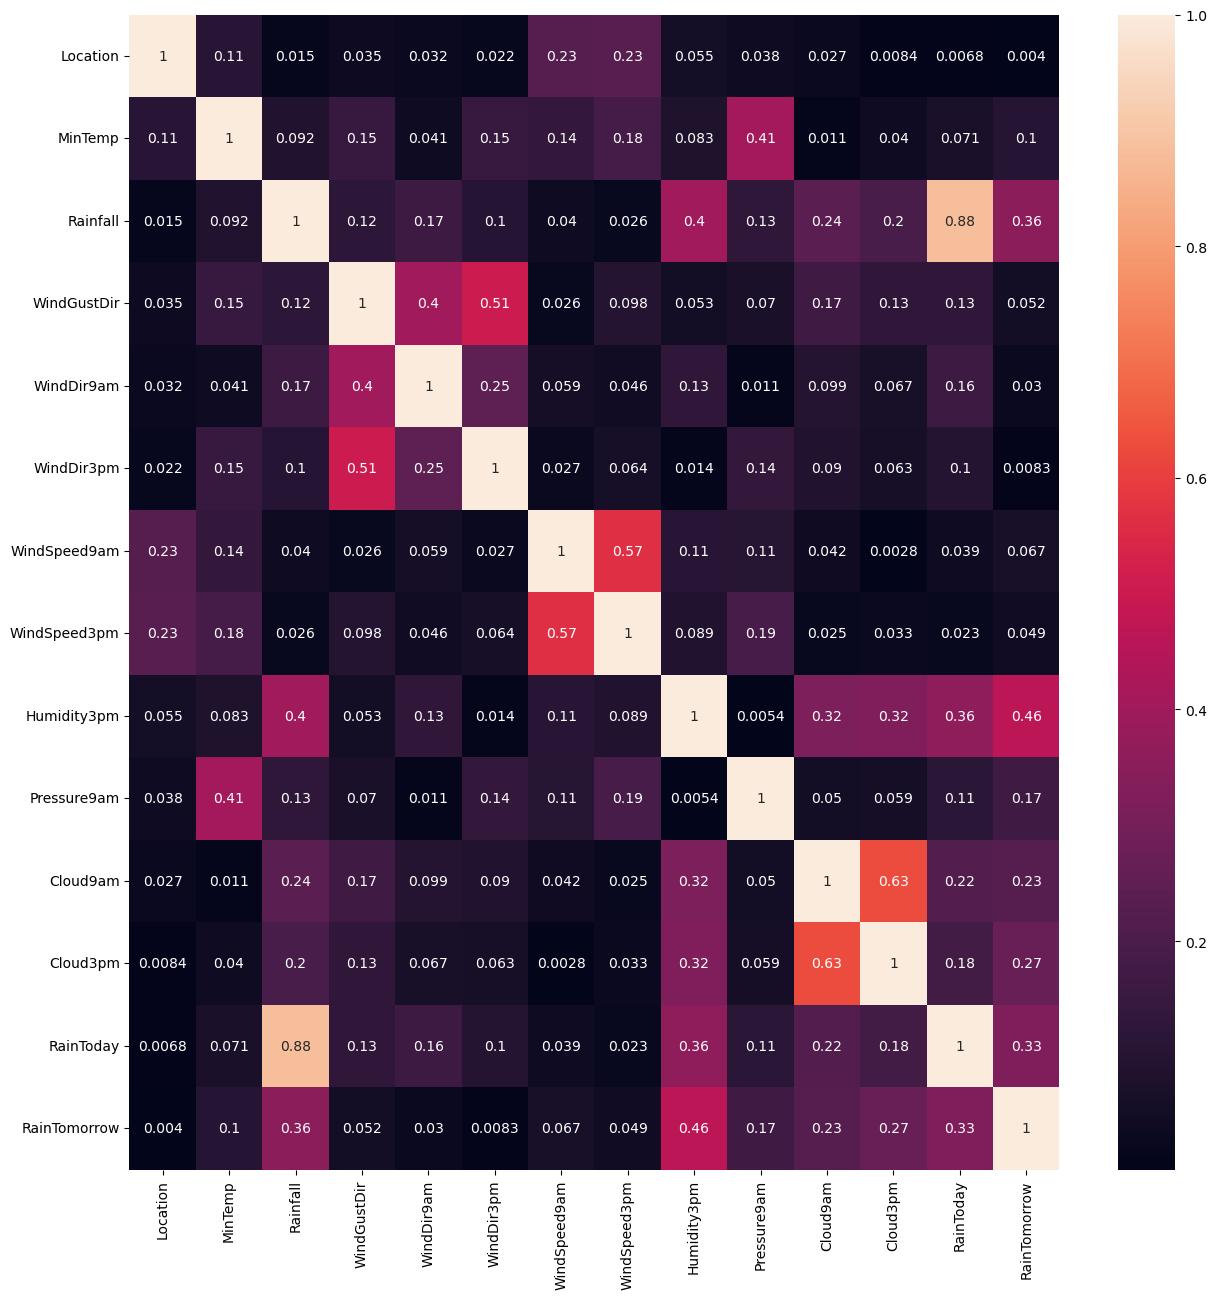

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().abs(),annot=True)

In [44]:
df.drop(['Cloud3pm'],axis=1, inplace=True)

In [ ]:
#cheing data distribution now and looking for outliers

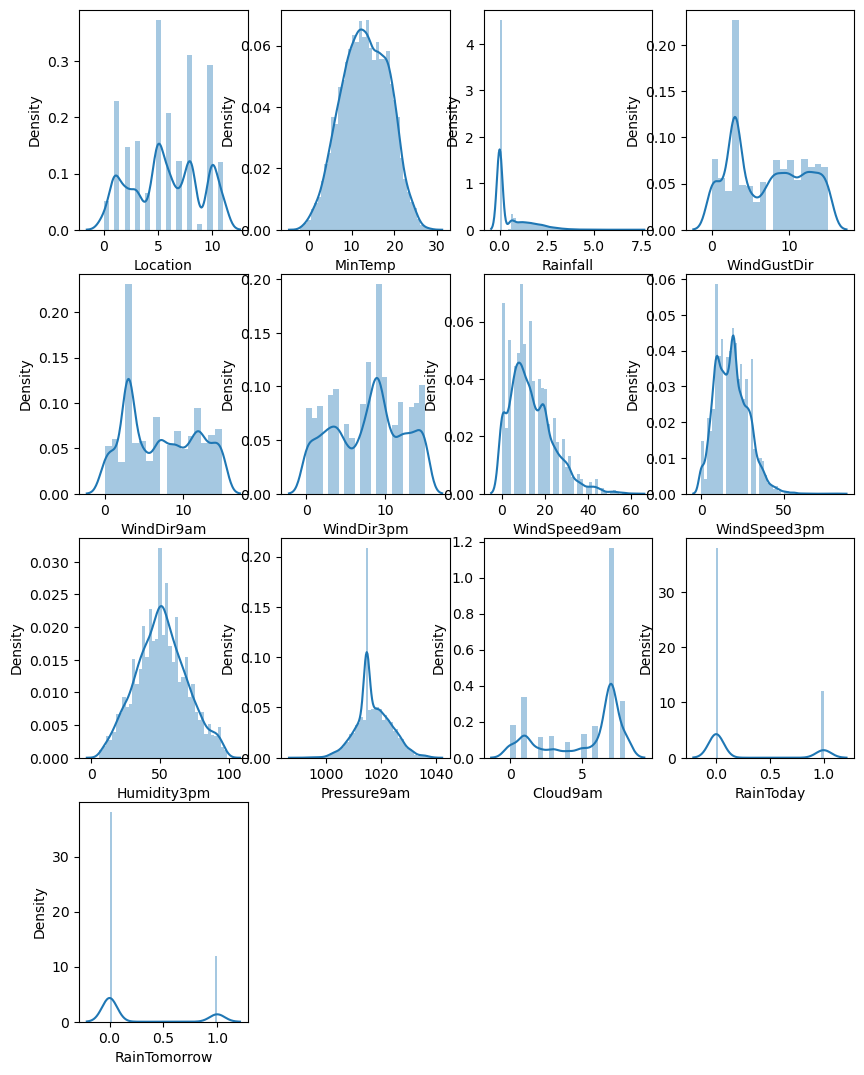

In [45]:
plt.figure(figsize=(10,20))
p=1

for column in df:
    if p<=24:
        ax=plt.subplot(6,4,p)
        sns.distplot(df[column])
        
    p+=1
plt.show()

In [ ]:
#rainfall is only contionus according to my assumptions.

In [46]:
df

,Location,MinTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Cloud9am,RainToday,RainTomorrow
Date,,,,,,,,,,,,,
2008-12-01,1,13.4,0.843433,13,13,14,20.0,24.0,22.0,1007.7,8.0,0,0
2008-12-02,1,7.4,0.000000,14,6,15,4.0,22.0,25.0,1010.6,7.0,0,0
2008-12-03,1,12.9,0.000000,15,13,15,19.0,26.0,30.0,1007.6,7.0,0,0
2008-12-04,1,9.2,0.000000,4,9,0,11.0,9.0,16.0,1017.6,7.0,0,0
2008-12-05,1,17.5,1.000000,13,1,7,7.0,20.0,33.0,1010.8,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,9,3.5,0.000000,0,2,0,15.0,13.0,27.0,1024.7,7.0,0,0
2017-06-21,9,2.8,0.000000,0,9,1,13.0,11.0,24.0,1024.6,7.0,0,0
2017-06-22,9,3.6,0.000000,6,9,3,13.0,9.0,21.0,1023.5,7.0,0,0


In [54]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
df2=df  #coping data for second model

# Model for RainTomorrow

In [37]:
X=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [40]:
std=StandardScaler()

scld=std.fit_transform(X)

In [41]:
VIF=pd.DataFrame()     #for feature selection cross verification using VIF 

VIF['vif_score']=[variance_inflation_factor(scld,i)for i in range(scld.shape[1])]
VIF['NAME']=X.columns

In [42]:
VIF

,vif_score,NAME
0,1.091704,Location
1,1.329646,MinTemp
2,1.290335,Rainfall
3,1.570320,WindGustDir
4,1.236601,WindDir9am
5,1.407236,WindDir3pm
6,1.527538,WindSpeed9am
7,1.571911,WindSpeed3pm
8,1.307336,Humidity3pm
9,1.297983,Pressure9am


In [48]:
smote=SMOTE(random_state=100)

x_train_s,y_train_s=smote.fit_resample(x_train,y_train)

In [47]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25)

# First model is logistic regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
ln=LogisticRegression()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    ln.fit(x_train,y_train)

    pred=ln.predict(x_train)
    acc=accuracy_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)


0.8375969631952468
581


In [50]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=581)
ln.fit(x_train,y_train)

ypred=ln.predict(x_train)
acc_train=accuracy_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=ln.predict(x_test)
acc_test=accuracy_score(pred,y_test)  
print('Best test accuracy is',acc_test)

Best training accuracy is 0.8375969631952468
Best test accuracy is 0.799009900990099


In [ ]:
# train accuracy is 83% and 79%.

In [51]:
ln.fit(x_train_s,y_train_s)

ypred=ln.predict(x_train_s)
acc_train=accuracy_score(ypred,y_train_s)
print('Best training accuracy is',acc_train)

pred=ln.predict(x_test)
acc_test=accuracy_score(pred,y_test)  
print('Best test accuracy is',acc_test)

Best training accuracy is 0.762054054054054
Best test accuracy is 0.7653465346534654


In [ ]:
#after smote new output results.

# Second model is KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
kn=KNeighborsClassifier()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    kn.fit(x_train,y_train)

    pred=kn.predict(x_train)
    acc=accuracy_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)


0.8833140782307312
722


ValueError: Found input variables with inconsistent numbers of samples: [2020, 6059]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=722)
kn.fit(x_train,y_train)

ypred=kn.predict(x_train)
acc_train=accuracy_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=kn.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.8833140782307312
Best test accuracy is 0.808910891089109


In [ ]:
# Knn Accuracy is 88% and 80%

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param={'algorithm':['brute','kd_tree'],
      'leaf_size':[1,2,3,4,5,6,7,8,9,10],
      'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
      }

In [56]:
gd=GridSearchCV(kn,param_grid=param)

In [57]:
gd.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'kd_tree'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [58]:
gd.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=1)

In [59]:
knn=KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=1)

In [60]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=1)

In [61]:
ypred=knn.predict(x_train)
acc_train=accuracy_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=knn.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)
print(confusion_matrix(y_test,pred))

Best training accuracy is 0.9993398250536392
Best test accuracy is 0.8202970297029702
[[1343  175]
 [ 188  314]]


In [ ]:
# differnece is quite high between train and test
#TP is good but other values are quite high.

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
dt=DecisionTreeClassifier()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    dt.fit(x_train,y_train)

    pred=dt.predict(x_train)
    acc=accuracy_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)


1.0
32


In [68]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=32)
ypred=dt.predict(x_train)
acc_train=accuracy_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=dt.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)
print(confusion_matrix(y_test,pred))

Best training accuracy is 0.9590691533256313
Best test accuracy is 0.9514851485148514
[[1477   55]
 [  43  445]]


In [ ]:
#decision tree is giving very good outputs.
#confusion matrix is also predicting very well.
#doing hyperparameter tunnning just to improve little.

In [64]:
param={'criterion':['ginni','entropy'],
      'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10],
      
      'max_depth':[1,2,3,4,5,6,7,8,9,10],
      'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

In [65]:
Gd=GridSearchCV(dt,param_grid=param)

In [66]:
Gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [67]:
Gd.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)

In [84]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)

In [85]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)

In [86]:
ypred=dt.predict(x_train)
acc_train=accuracy_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=dt.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)
print(confusion_matrix(y_test,pred))

Best training accuracy is 0.82356824558508
Best test accuracy is 0.8202970297029702
[[1489   43]
 [ 320  168]]


In [ ]:
#accuracy is decreased.and FN prediction is increase.

In [88]:
from sklearn.ensemble import BaggingClassifier

In [90]:
bag=BaggingClassifier(dt,n_estimators=20)

In [91]:
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        max_leaf_nodes=10),
                  n_estimators=20)

In [95]:
ypred=bag.predict(x_train)
acc_train=accuracy_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=bag.predict(x_test)
acc_test=accuracy_score(pred,y_test)
print('Best test accuracy is',acc_test)
print(confusion_matrix(y_test,pred))

Best training accuracy is 0.8245585080046213
Best test accuracy is 0.8207920792079207
[[1485   47]
 [ 315  173]]


In [ ]:
#Bagging classifier for a number of prediction and for idea that best accuracy is around 82%.
#FN is quite high in this case too.

# NOW predicting rainfall 

In [61]:
df2

,Location,MinTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Cloud9am,RainToday,RainTomorrow
Date,,,,,,,,,,,,,
2008-12-01,1,13.4,0.843433,13,13,14,20.0,24.0,22.0,1007.7,8.0,0,0
2008-12-02,1,7.4,0.000000,14,6,15,4.0,22.0,25.0,1010.6,7.0,0,0
2008-12-03,1,12.9,0.000000,15,13,15,19.0,26.0,30.0,1007.6,7.0,0,0
2008-12-04,1,9.2,0.000000,4,9,0,11.0,9.0,16.0,1017.6,7.0,0,0
2008-12-05,1,17.5,1.000000,13,1,7,7.0,20.0,33.0,1010.8,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,9,3.5,0.000000,0,2,0,15.0,13.0,27.0,1024.7,7.0,0,0
2017-06-21,9,2.8,0.000000,0,9,1,13.0,11.0,24.0,1024.6,7.0,0,0
2017-06-22,9,3.6,0.000000,6,9,3,13.0,9.0,21.0,1023.5,7.0,0,0


In [62]:
X=df2.drop('Rainfall',axis=1)
y=df2['Rainfall']

In [63]:
std=StandardScaler()

scld=std.fit_transform(X)

In [64]:
X

,Location,MinTemp,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Cloud9am,RainToday,RainTomorrow
Date,,,,,,,,,,,,
2008-12-01,1,13.4,13,13,14,20.0,24.0,22.0,1007.7,8.0,0,0
2008-12-02,1,7.4,14,6,15,4.0,22.0,25.0,1010.6,7.0,0,0
2008-12-03,1,12.9,15,13,15,19.0,26.0,30.0,1007.6,7.0,0,0
2008-12-04,1,9.2,4,9,0,11.0,9.0,16.0,1017.6,7.0,0,0
2008-12-05,1,17.5,13,1,7,7.0,20.0,33.0,1010.8,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,9,3.5,0,2,0,15.0,13.0,27.0,1024.7,7.0,0,0
2017-06-21,9,2.8,0,9,1,13.0,11.0,24.0,1024.6,7.0,0,0
2017-06-22,9,3.6,6,9,3,13.0,9.0,21.0,1023.5,7.0,0,0


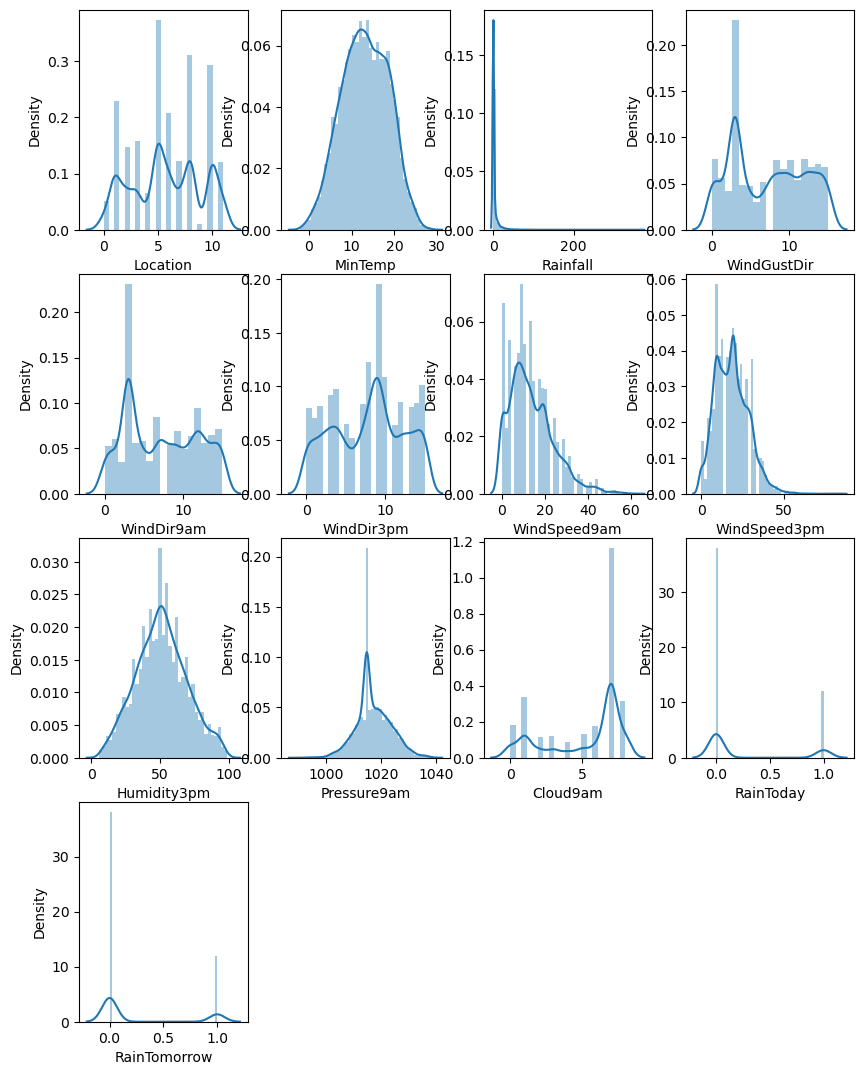

In [112]:
plt.figure(figsize=(10,20))
p=1

for column in df2:
    if p<=24:
        ax=plt.subplot(6,4,p)
        sns.distplot(df2[column])
        
    p+=1
plt.show()

In [11]:
df2['Rainfall']=np.cbrt(df2['Rainfall'])

In [ ]:
#rainfall is highly skewed to right. using cbrt.

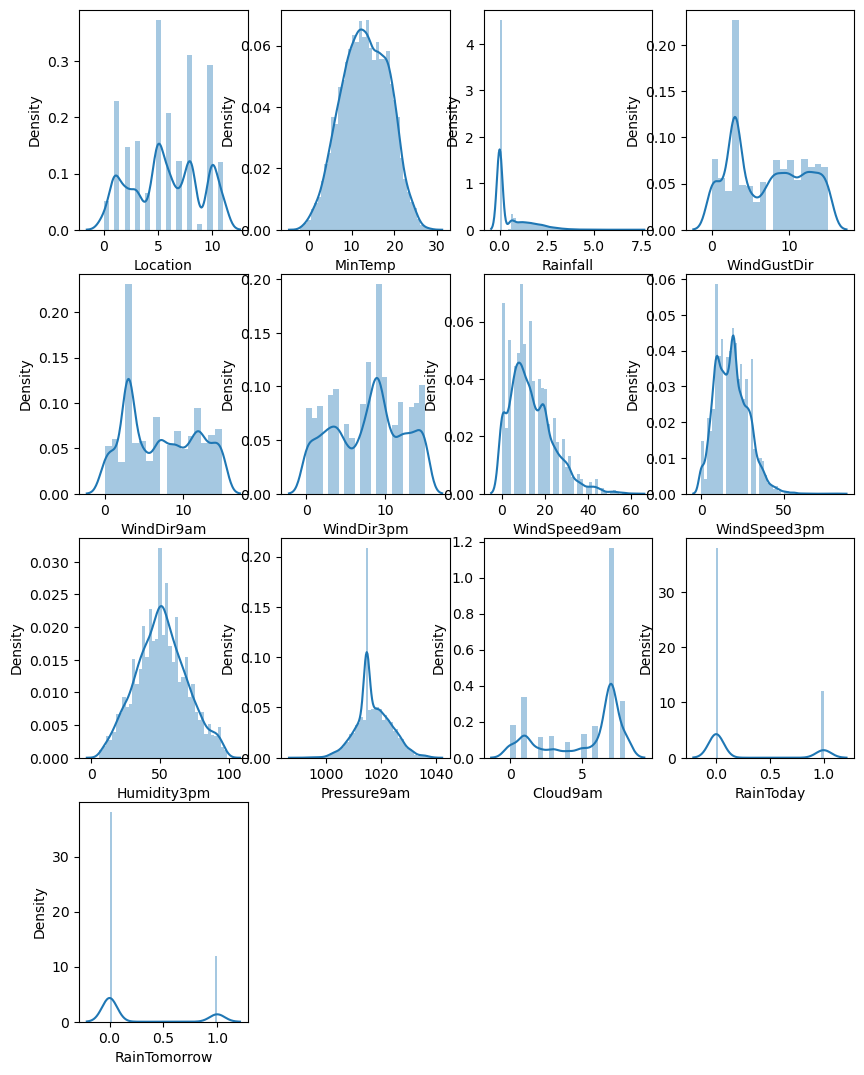

In [49]:
plt.figure(figsize=(10,20))
p=1

for column in df2:
    if p<=24:
        ax=plt.subplot(6,4,p)
        sns.distplot(df2[column])
        
    p+=1
plt.show()

In [50]:
df2['Rainfall'].value_counts()

0.000000    5234
0.584804     404
0.736806     177
0.843433     112
1.118689      84
            ... 
5.039684       1
4.481405       1
3.252267       1
3.220442       1
3.419952       1
Name: Rainfall, Length: 250, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
le=LinearRegression()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    le.fit(x_train,y_train)

    pred=le.predict(x_train)
    acc=r2_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)


0.7469341804051655
52


In [67]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=52)
le.fit(x_train,y_train)

ypred=le.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=le.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.7469341804051655
Best test accuracy is 0.6650569328609142


In [68]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

best_acc=0
best_random_state=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    dt.fit(x_train,y_train)

    pred=dt.predict(x_train)
    acc=r2_score(pred,y_train)
    
    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

1.0
6


In [69]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=6)
dt.fit(x_train,y_train)

ypred=dt.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=dt.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 1.0
Best test accuracy is 0.713733165512322


In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
knn=KNeighborsRegressor()
best_acc=0
best_random_state=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    knn.fit(x_train,y_train)

    pred=dt.predict(x_train)
    acc=r2_score(pred,y_train)
    
    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

1.0
6


In [72]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=6)
knn.fit(x_train,y_train)

ypred=knn.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=knn.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.8346160121636926
Best test accuracy is 0.7323423032217308


In [ ]:
#knn is working Good in rainfall prediction

In [73]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
best_acc=0
best_random_state=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    ada.fit(x_train,y_train)

    pred=ada.predict(x_train)
    acc=r2_score(pred,y_train)
    
    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

0.7730728961815156
195


In [74]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=195)
ada.fit(x_train,y_train)

ypred=ada.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=ada.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.7664379842219099
Best test accuracy is 0.7311507030379619


In [ ]:
#adaboost is having 76 and 73%.

In [75]:
mean_absolute_error(y_test,pred)

0.32537365995316014

In [78]:
import pickle

In [79]:
pickle.dump(df,open('Rainfal prediction','wb'))